# **Cohort Analysis for Customer Behavior Insights**

This project analyzes transaction records related to unique gift items, with data collected between December 2010 and December 2011.

The objective is to identify business trends and customer retention patterns using cohort analysis. In this context, cohort analysis involves segmenting customers based on when they first made a purchase and monitoring differences in repeat purchase rates and engagement as time passes.

In this project, customers are divided into cohorts according to their initial purchase month, and metrics such as repeat purchase rates and spending are analyzed over time for each group. This approach highlights behavioral changes throughout the customer lifecycle and provides actionable insights for business strategy and customer management.

#### **Dataset Overview**

- InvoiceNo:	A 6-digit order identifier (codes starting with 'C' indicate order cancellations or product returns)

- StockCode:	Unique code for each product

- Description:	Product name

- Quantity:	Number of items per transaction (negative values indicate order cancellations or product returns)

- InvoiceDate:	Timestamp when the transaction occurred

- UnitPrice:	Price per item in GBP(£)

- CustomerID:	Unique 5-digit ID assigned to each customer

- Country:	Customer's country of residence

## **Data Exploration and Preprocessing**

In [1]:
import numpy as np
import pandas as pd

!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 5)

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/DataAnalytics/ecommerce.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [7]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
df[df['Description'].isna()].UnitPrice.unique()

array([0.])

In [10]:
df[df['Description'].isna()].CustomerID.unique()

array([nan])

Rows with missing values in the Description field also have a UnitPrice of 0 and no CustomerID.
These records are likely not associated with real transactions and seem to have been added for internal inventory tracking.
Thus, I will remove all rows where the Description field is missing.

In [11]:
df = df[df['Description'].notna()]
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133626
Country,0


In [12]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [13]:
df[df['CustomerID'].isna()].UnitPrice.describe()

,UnitPrice
count,133626.000000
mean,8.164459
std,152.722663
min,-11062.060000
25%,1.630000
50%,3.290000
75%,5.790000
max,17836.460000


In [14]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [15]:
df = df[df['UnitPrice'] >= 0]

In [16]:
df[df['CustomerID'].isna()].Country.unique()

array(['United Kingdom', 'EIRE', 'Bahrain', 'Israel', 'Hong Kong',
       'Unspecified', 'France', 'Switzerland', 'Portugal'], dtype=object)

Rows with missing CustomerID still contain valid transaction details such as purchase amount and country information, indicating they represent real sales.

Although these entries cannot be used for customer-level analysis due to the missing ID, they are still relevant for evaluating overall transaction volume and will therefore be retained.

In [17]:
df['CustomerID'] = df['CustomerID'].fillna('N/A')
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [18]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,540453.000000,540453,540453.000000
mean,9.603161,2011-07-04 16:20:30.497305344,4.664472
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,1.000000,2011-03-28 11:49:00,1.250000
50%,3.000000,2011-07-20 11:38:00,2.080000
75%,10.000000,2011-10-19 11:49:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.008001,NaN,94.522031


In [19]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,540453,540453,540453,540453.000000,540453,540453.000000,540453,540453
unique,24444,3958,4223,NaN,NaN,NaN,4373,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,N/A,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,133624,494022
mean,NaN,NaN,NaN,9.603161,2011-07-04 16:20:30.497305344,4.664472,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,0.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:49:00,1.250000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-20 11:38:00,2.080000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:49:00,4.130000,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN


In [20]:
df[df.InvoiceNo.str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [21]:
df[~df.InvoiceNo.str.startswith('C')].query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,21275,?,-30,2010-12-03 16:50:00,0.0,N/A,United Kingdom
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,N/A,United Kingdom
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,N/A,United Kingdom
13264,537432,35833G,damages,-43,2010-12-06 16:10:00,0.0,N/A,United Kingdom
21338,538072,22423,faulty,-13,2010-12-09 14:10:00,0.0,N/A,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,N/A,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,N/A,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,N/A,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,N/A,United Kingdom


In [22]:
df[~df.InvoiceNo.str.startswith('C')].query('Quantity < 0').UnitPrice.unique()

array([0.])

In [23]:
df[~df.InvoiceNo.str.startswith('C')].query('Quantity < 0').Description.value_counts().head(10)

,count
Description,
check,120
damages,45
damaged,42
?,41
sold as set on dotcom,20
Damaged,14
thrown away,9
"Unsaleable, destroyed.",9
??,7


Rows where the InvoiceNo does not start with "C" but have a negative Quantity consistently show a unit price of 0 and lack valid product names in the Description field.

These entries are likely unrelated to actual transactions—possibly added for internal stock tracking purposes—so they will be excluded from the dataset.

In [24]:
df = df.query("InvoiceNo.str.startswith('C') | Quantity >= 0")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [25]:
df.duplicated().sum()

np.int64(5268)

In [26]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [27]:
df.shape

(534711, 8)

## **EDA (Exploratory Data Analysis)**

### **1. Analysis of Monthly Transaction Trends**

In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df.Country.unique(), len(df.Country.unique())

(array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
        'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
        'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
        'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
        'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
        'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
        'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
        'European Community', 'Malta', 'RSA'], dtype=object),
 38)

In [30]:
print(min(df['InvoiceDate']))
print(max(df['InvoiceDate']))

2010-12-01 08:26:00
2011-12-09 12:50:00


In [31]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df[['InvoiceDate', 'InvoiceMonth']].head()

,InvoiceDate,InvoiceMonth
0,2010-12-01 08:26:00,2010-12
1,2010-12-01 08:26:00,2010-12
2,2010-12-01 08:26:00,2010-12
3,2010-12-01 08:26:00,2010-12
4,2010-12-01 08:26:00,2010-12


**Monthly Customer Trend**

Monthly unique customers are counted based on CustomerID. Missing values are included as they have minimal impact on the overall trend.

In [32]:
monthly_cust_cnt = df.groupby('InvoiceMonth')[['CustomerID']].nunique().reset_index()
monthly_cust_cnt

,InvoiceMonth,CustomerID
0,2010-12,949
1,2011-01,784
2,2011-02,799
3,2011-03,1021
4,2011-04,900
5,2011-05,1080
6,2011-06,1052
7,2011-07,994
8,2011-08,981
9,2011-09,1303


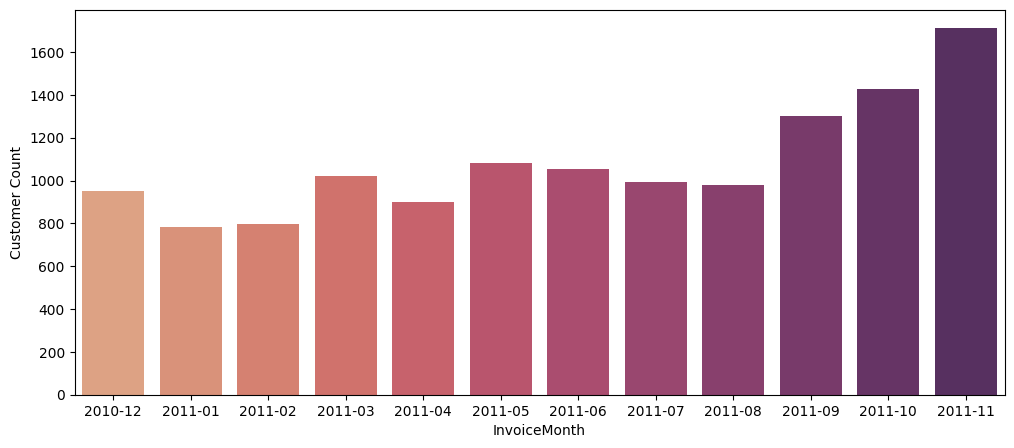

In [33]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=monthly_cust_cnt.query('InvoiceMonth != "2011-12"'),
    x='InvoiceMonth', y='CustomerID', palette='flare'
)
plt.ylabel('Customer Count');

**Monthly Sales Volume Trend**

In [34]:
monthly_txn_cnt = df.groupby('InvoiceMonth')[['InvoiceNo']].nunique().reset_index()
monthly_txn_cnt

,InvoiceMonth,InvoiceNo
0,2010-12,1892
1,2011-01,1349
2,2011-02,1320
3,2011-03,1777
4,2011-04,1495
5,2011-05,2003
6,2011-06,1867
7,2011-07,1755
8,2011-08,1643
9,2011-09,2191


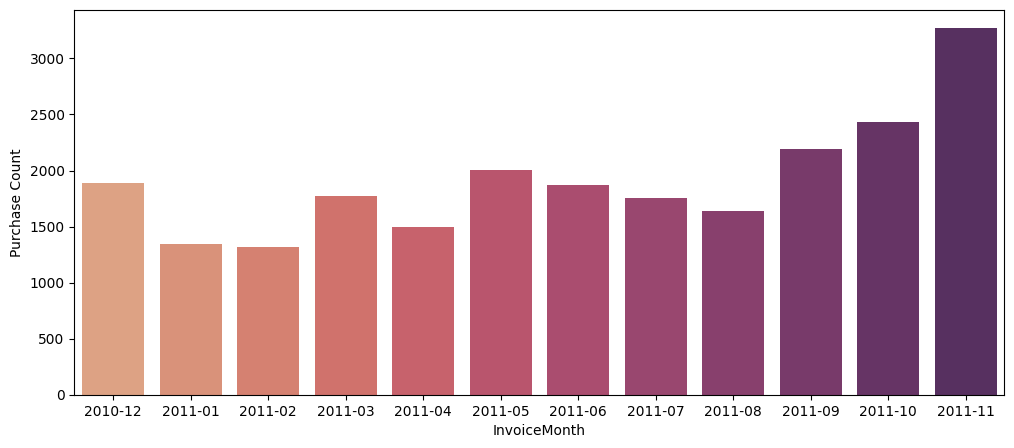

In [35]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=monthly_txn_cnt.query('InvoiceMonth != "2011-12"'),
    x='InvoiceMonth', y='InvoiceNo', palette='flare'
)
plt.ylabel('Purchase Count');

**Monthly Revenue Trend**

In [36]:
df['TotalAmt'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'TotalAmt']].head()

,Quantity,UnitPrice,TotalAmt
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [37]:
# Monthly total sales
monthly_sales = df.groupby('InvoiceMonth')[['TotalAmt']].sum().reset_index()
monthly_sales

,InvoiceMonth,TotalAmt
0,2010-12,746723.610
1,2011-01,558448.560
2,2011-02,497026.410
3,2011-03,682013.980
4,2011-04,492367.841
5,2011-05,722094.100
6,2011-06,689977.230
7,2011-07,680156.991
8,2011-08,703510.580
9,2011-09,1017596.682


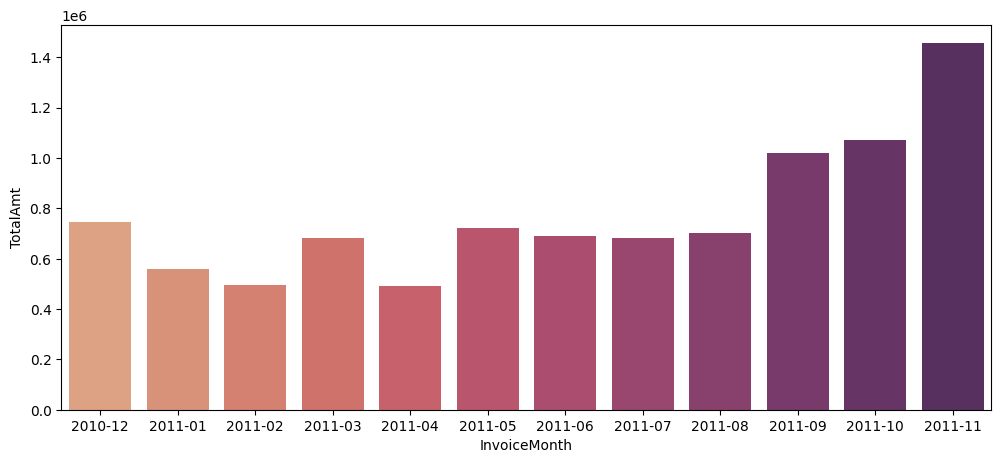

In [38]:
plt.figure(figsize=(12, 5))
sns.barplot(
    data=monthly_sales.query('InvoiceMonth != "2011-12"'),
    x='InvoiceMonth', y='TotalAmt', palette='flare'
);

All key indicators—including monthly customer count, purchase volume, and total revenue—demonstrate a positive, upward trajectory. This overall pattern suggests that the business is experiencing stable and healthy growth.

### **2. Cohort Analysis**

In [39]:
# Filter out missing CustomerID and last month
cohort_base = df.query('CustomerID != "N/A" & InvoiceMonth != "2011-12"')

Using the transform() function in pandas, we grouped data by CustomerID and extracted the earliest InvoiceMonth for each customer, populating this value in all corresponding rows.

In [40]:
# Assign the earliest purchase month to each customer
cohort_base['CohortMonth'] = cohort_base.groupby('CustomerID')['InvoiceMonth'].transform('min')
cohort_base.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalAmt,CohortMonth
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11,-0.85,2011-03
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11,-3.29,2011-03
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11,-1.25,2010-12
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11,-7.95,2010-12
516383,C579887,23490,T-LIGHT HOLDER HANGING LOVE BIRD,-3,2011-11-30 17:42:00,3.75,16717.0,United Kingdom,2011-11,-11.25,2010-12


In [41]:
# Aggregate cohort data: customers, transactions, and total amount
cohort_agg = cohort_base.groupby(['CohortMonth', 'InvoiceMonth']).agg({
    'CustomerID': pd.Series.nunique,
    'InvoiceNo': pd.Series.nunique,
    'TotalAmt': 'sum'
}).reset_index()

cohort_agg.columns = ['CohortMonth', 'InvoiceMonth', 'Custs', 'Txns', 'TotalAmt']

# Calculate average transactions and spend per customer
cohort_agg['TxnPerCust'] = cohort_agg['Txns'] / cohort_agg['Custs']
cohort_agg['SpendPerCust'] = cohort_agg['TotalAmt'] / cohort_agg['Custs']

cohort_agg.head()

,CohortMonth,InvoiceMonth,Custs,Txns,TotalAmt,TxnPerCust,SpendPerCust
0,2010-12,2010-12,948,1708,552372.86,1.801688,582.671793
1,2010-12,2011-01,362,689,271081.05,1.903315,748.842680
2,2010-12,2011-02,317,579,230416.17,1.826498,726.864890
3,2010-12,2011-03,367,753,301779.44,2.051771,822.287302
4,2010-12,2011-04,341,611,200555.55,1.791789,588.139443


In [42]:
# Sort for consistent cohort order
cohort_agg = cohort_agg.sort_values(by=['CohortMonth', 'InvoiceMonth'])

# Cohort index (months since cohort entry)
cohort_agg['CohortIdx'] = cohort_agg.groupby('CohortMonth')['InvoiceMonth'].transform(lambda x: np.arange(len(x)) + 1)

cohort_agg.head(12)

,CohortMonth,InvoiceMonth,Custs,Txns,TotalAmt,TxnPerCust,SpendPerCust,CohortIdx
0,2010-12,2010-12,948,1708,552372.86,1.801688,582.671793,1
1,2010-12,2011-01,362,689,271081.05,1.903315,748.842680,2
2,2010-12,2011-02,317,579,230416.17,1.826498,726.864890,3
3,2010-12,2011-03,367,753,301779.44,2.051771,822.287302,4
4,2010-12,2011-04,341,611,200555.55,1.791789,588.139443,5
5,2010-12,2011-05,376,801,321097.90,2.130319,853.983777,6
6,2010-12,2011-06,360,736,312399.91,2.044444,867.777528,7
7,2010-12,2011-07,336,691,303427.42,2.056548,903.057798,8
8,2010-12,2011-08,336,661,310117.67,1.967262,922.969256,9
9,2010-12,2011-09,374,798,465596.61,2.133690,1244.910722,10


In [43]:
cohort_agg.tail(10)

,CohortMonth,InvoiceMonth,Custs,Txns,TotalAmt,TxnPerCust,SpendPerCust,CohortIdx
68,2011-08,2011-08,167,203,77503.270,1.215569,464.091437,1
69,2011-08,2011-09,42,59,19093.330,1.404762,454.603095,2
70,2011-08,2011-10,42,70,33016.140,1.666667,786.098571,3
71,2011-08,2011-11,42,68,39870.900,1.619048,949.307143,4
72,2011-09,2011-09,298,377,152935.381,1.265101,513.205977,1
73,2011-09,2011-10,89,127,25656.570,1.426966,288.276067,2
74,2011-09,2011-11,97,154,35663.220,1.587629,367.662062,3
75,2011-10,2011-10,352,455,153634.120,1.292614,436.460568,1
76,2011-10,2011-11,93,167,38874.640,1.795699,418.006882,2
77,2011-11,2011-11,321,425,132770.590,1.323988,413.615545,1


**Cohort Retention Rate**

We track the repeat purchase rate for each cohort as time progressed.

To do this, we pivoted the data so that each row represented a cohort (by first purchase month), and columns represented the number of months since acquisition. Dividing subsequent months’ customer counts by the initial month’s count allowed us to visualize and compare retention rates over time.

In [44]:
cohort_mat = cohort_agg.pivot(index='CohortMonth', columns='CohortIdx', values='Custs')
cohort_mat

CohortIdx,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
retention_mat = cohort_mat.divide(cohort_mat[1], axis=0)
retention_mat

CohortIdx,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.5
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


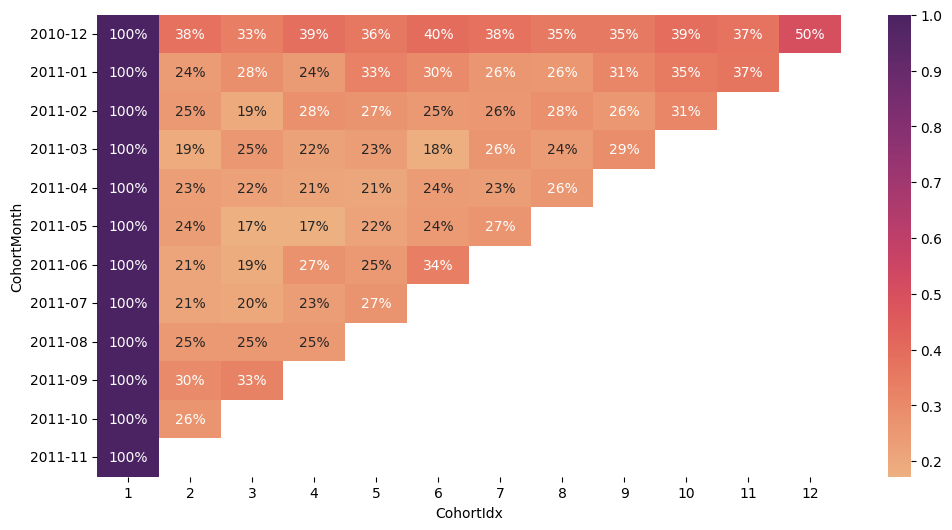

In [46]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_mat, annot=True, cmap='flare', fmt='.0%');

**Cohort Retention Results**

**(1) Vertical perspective:** Does the retention rate differ by customer acquisition cohort?

  - Examining the retention rates by acquisition month reveals whether newer customers are more likely to make repeat purchases than earlier cohorts. In many businesses, an upward trend would suggest improvements in product or service quality. In this dataset, however, more recent cohorts do not display significantly higher retention rates than earlier ones.

  - To improve business performance, it may be beneficial to introduce new engagement or loyalty programs targeting recently acquired customers to raise their repeat purchase rates closer to 40%, matching that of the top cohorts.

**(2) Horizontal perspective:** Does the retention rate change over time since the first purchase?

  - Analyzing retention rates across time for each cohort helps identify whether there is a drop-off in repeat purchases after the initial transaction. In this dataset, most cohorts maintain a repeat purchase rate around 20% over time, without major declines, indicating overall business stability.

**(3) Diagonal perspective:** Are there any periods where the retention rate is exceptionally high or low across all cohorts?

  - Notably, many cohorts see a spike in repeat purchase rates in November 2011, suggesting possible seasonality in the autumn and winter. With additional data, this trend could support targeted campaigns to encourage repeat purchases during high-demand periods.

**Average Purchases per Cohort**

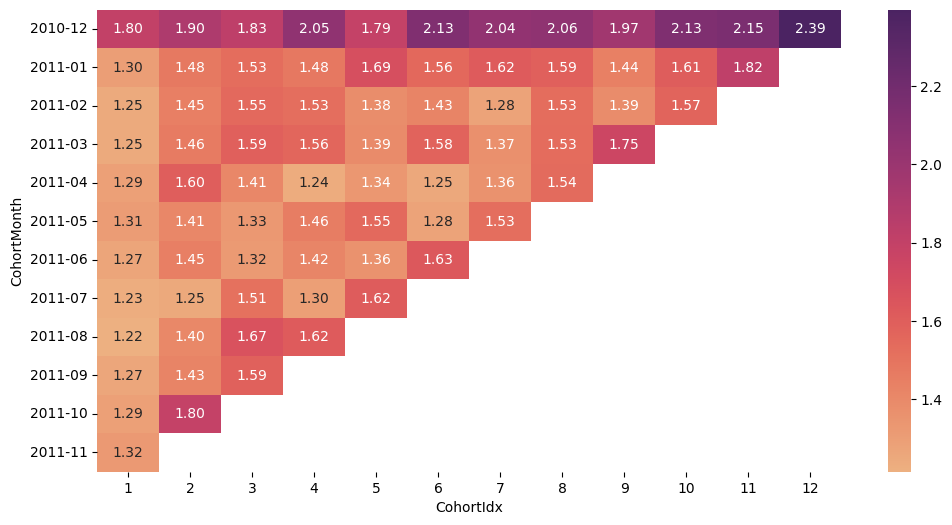

In [47]:
# Pivot average transactions per customer
txn_avg_mat = cohort_agg.pivot(index='CohortMonth', columns='CohortIdx', values='TxnPerCust')
plt.figure(figsize=(12, 6))
sns.heatmap(txn_avg_mat, annot=True, cmap='flare', fmt='.2f');

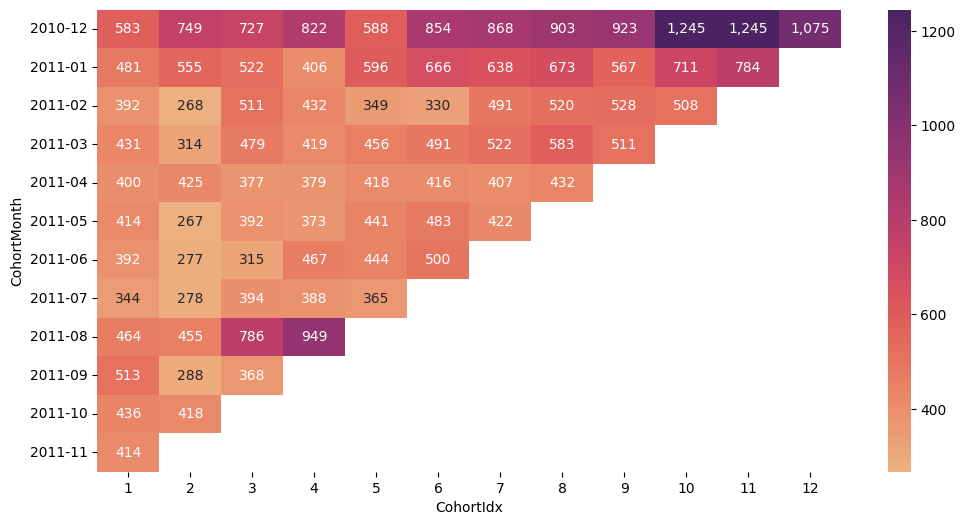

In [48]:
# Pivot average spend per customer
spend_avg_mat = cohort_agg.pivot(index='CohortMonth', columns='CohortIdx', values='SpendPerCust')
plt.figure(figsize=(12, 6))
sns.heatmap(spend_avg_mat, annot=True, cmap='flare', fmt=',.0f');

**Cohort Purchase Frequency and Spending**

**(1) Vertical Perspective:**

- If more recently acquired customers consistently make more purchases in their first month compared to earlier cohorts, this would indicate business growth. However, our data shows little difference between cohorts in this respect.

**(2) Horizontal Perspective:**

- In most cohorts, the average purchase count remains stable or even increases after the first month, which is a positive sign for business momentum.

**(3) Diagonal Perspective:**

- Average purchases per customer also tend to rise in November, reinforcing the idea of winter seasonality.

### **3. Product-Level Analysis**

**Top 10 Products by Revenue**

In [49]:
prod_sales = df.groupby(['StockCode', 'Description'])[['TotalAmt']].sum().reset_index()
prod_sales = prod_sales.sort_values(by='TotalAmt', ascending=False)
prod_sales.head(10)

,StockCode,Description,TotalAmt
4323,DOT,DOTCOM POSTAGE,206245.48
1403,22423,REGENCY CAKESTAND 3 TIER,164459.49
2999,47566,PARTY BUNTING,98243.88
3805,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97659.94
3782,85099B,JUMBO BAG RED RETROSPOT,92175.79
2116,23084,RABBIT NIGHT LIGHT,66661.63
4326,POST,POSTAGE,66230.64
1076,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63715.24
3563,84879,ASSORTED COLOUR BIRD ORNAMENT,58792.42
3191,79321,CHILLI LIGHTS,53746.66


In [50]:
# Exclude 'DOT'/'POST', take top 10 products
top10_prod = prod_sales.query('StockCode not in ["DOT", "POST"]').head(10)
top10_prod

,StockCode,Description,TotalAmt
1403,22423,REGENCY CAKESTAND 3 TIER,164459.49
2999,47566,PARTY BUNTING,98243.88
3805,85123A,WHITE HANGING HEART T-LIGHT HOLDER,97659.94
3782,85099B,JUMBO BAG RED RETROSPOT,92175.79
2116,23084,RABBIT NIGHT LIGHT,66661.63
1076,22086,PAPER CHAIN KIT 50'S CHRISTMAS,63715.24
3563,84879,ASSORTED COLOUR BIRD ORNAMENT,58792.42
3191,79321,CHILLI LIGHTS,53746.66
2386,23298,SPOTTY BUNTING,42030.67
1370,22386,JUMBO BAG PINK POLKADOT,41584.43


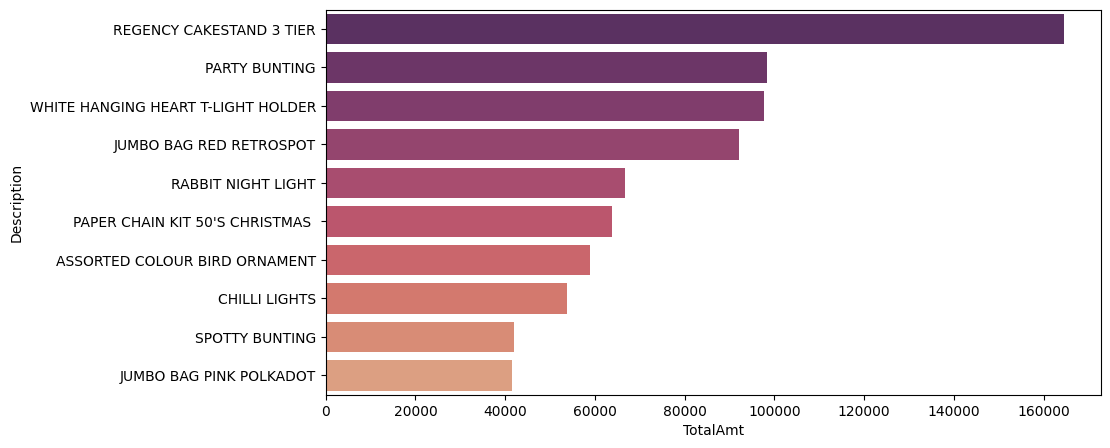

In [51]:
sns.barplot(data=top10_prod, y='Description', x='TotalAmt', palette='flare_r');

**Monthly Revenue Trends for Top Products**

We further explored monthly revenue patterns for the top 10 products.

In [52]:
# Get product names for top 10
top10_names = list(top10_prod['Description'])

# Filter original df for only top 10 products
top10_df = df[df['Description'].isin(top10_names)]
top10_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalAmt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12,54.08
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,2010-12,204.00
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2010-12,15.30
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,2010-12,15.30


In [53]:
# Monthly sales for top 10 products
top10_monthly = top10_df.groupby(['Description', 'InvoiceMonth'])[['TotalAmt']].sum().reset_index()
top10_monthly.head()

,Description,InvoiceMonth,TotalAmt
0,ASSORTED COLOUR BIRD ORNAMENT,2010-12,3972.35
1,ASSORTED COLOUR BIRD ORNAMENT,2011-01,2880.03
2,ASSORTED COLOUR BIRD ORNAMENT,2011-02,2736.35
3,ASSORTED COLOUR BIRD ORNAMENT,2011-03,4280.73
4,ASSORTED COLOUR BIRD ORNAMENT,2011-04,4174.24


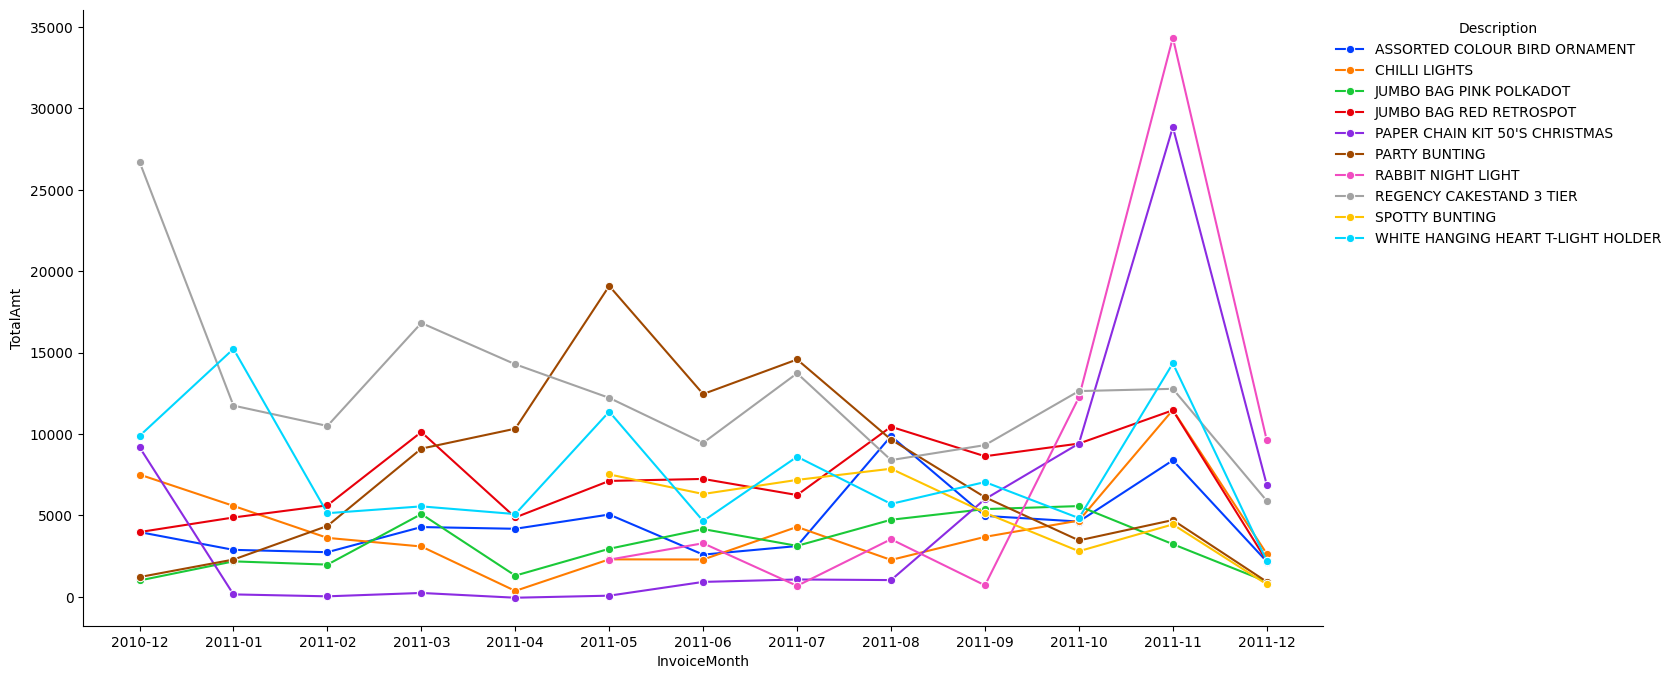

In [54]:
# Line plot for monthly sales trend (top 10 products)
fig, ax = plt.subplots(figsize=(16, 8))

sns.lineplot(
    data=top10_monthly,
    x='InvoiceMonth', y='TotalAmt',
    hue='Description', marker='o', palette='bright', ax=ax
)

sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

The three leading products demonstrated consistent sales throughout the year, highlighting their status as perennial best-sellers. (REGENCY CAKESTAND 3 TIER, PARTY BUNTING, WHITE HANGING HEART T-LIGHT HOLDER)

In contrast, products like PAPER CHAIN KIT 50'S CHRISTMAS and RABBIT NIGHT LIGHT saw dramatic sales spikes in November, pointing to their popularity during the winter holiday season.

For highly seasonal items, targeted promotions and special campaigns during peak periods, such as the winter holidays, may help maximize their sales potential.

## **Cohort Analysis Conclusion and Data-Driven Insights**

#### **Customer and Revenue Growth:**

Over the 12 months, the business experienced strong expansion. The number of unique customers per month increased from 949 in December 2010 to 1,712 in November 2011, an 81% increase.
Similarly, total monthly sales rose from £746,700 in December 2010 to £1,456,100 in November 2011, a 95% increase.
The steepest growth in both customer count and revenue was observed between September and November 2011, where customer counts grew from 1,303 to 1,712 and revenue rose from £1,017,600 to £1,456,100.

#### **Cohort Analysis and Retention:**

Cohort analysis shows that customer retention and engagement were notably higher among earlier groups. For example, the December 2010 cohort retained about 38% of its initial customers into the second month, while the August 2011 cohort retained 25%. Furthermore, for the December 2010 cohort, the average number of monthly purchases per customer remained above 1.5 during the first three months, whereas recent cohorts typically dropped below 1.2 after their first month.

#### **Business Implications:**

**(1) Customer Retention & Cohort Strategy:**

Earlier cohorts (e.g., Dec 2010) maintained higher retention and repeat purchases. Further analysis should identify the incentives and behaviors that contributed to this engagement, and similar onboarding and retention programs should be designed for new customers.

**(2) Seasonality & Inventory Planning:**

The data highlights strong winter seasonality, affecting both customer activity and specific products. For highly seasonal items, inventory and targeted promotions should be focused on October-December. In contrast, best-sellers should be stocked steadily all year.

**(3) Revenue Optimization:**

The significant growth from September to November suggests that effective marketing or operational strategies were in place. Identifying and reinforcing these actions will help sustain growth.

**(4) Ongoing Data Monitoring:**

Since December 2011 data only covers the first week, continued monitoring is necessary to confirm seasonal patterns and optimize planning for the next year.